## Treinando com o ChatGPT

Link do Chat: [GPT](https://chatgpt.com/c/67d24d99-78f4-8007-a5ac-585c68da7ad7)





#### 1. Carregar os dados: Carregue o arquivo CSV no seu notebook e exiba as primeiras 5 linhas da tabela para garantir que os dados foram importados corretamente.


In [2]:
# Importando a library da pandas com o alias de 'pd'

import pandas as pd
import matplotlib.pyplot as plt

In [3]:

# Isso aqui é um dataframe porque há mais de uma linha/coluna

# Lendo o arquivo .csv dentro da pasta 'data'
read_sales_data = pd.read_csv('../../data/sales_data.csv')
read_sales_data

,OrderID,Product,Category,Quantity,Price,Date
0,1,Laptop,Electronics,2,1500,2025-03-10
1,2,Mouse,Electronics,5,20,2025-03-11
2,3,Keyboard,Electronics,3,50,2025-03-12
3,4,T-Shirt,Clothing,4,15,2025-03-12
4,5,Shoes,Clothing,2,100,2025-03-13
5,6,Book,Books,7,10,2025-03-13
6,7,Smartphone,Electronics,1,800,2025-03-14
7,8,Jacket,Clothing,2,70,2025-03-15
8,9,Notebook,Stationery,10,5,2025-03-15
9,10,Pen,Stationery,20,1,2025-03-16


In [4]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

# Como .head trás por padrão, as 5 primeiras apenas isso basta. 
read_sales_data.head()

,OrderID,Product,Category,Quantity,Price,Date
0,1,Laptop,Electronics,2,1500,2025-03-10
1,2,Mouse,Electronics,5,20,2025-03-11
2,3,Keyboard,Electronics,3,50,2025-03-12
3,4,T-Shirt,Clothing,4,15,2025-03-12
4,5,Shoes,Clothing,2,100,2025-03-13


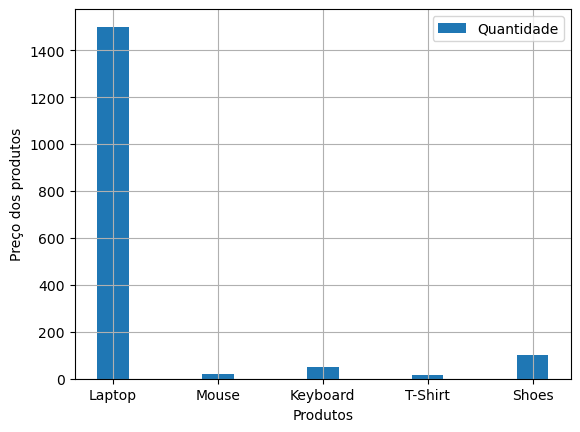

In [5]:
five_products = read_sales_data.head()

plt.bar(five_products['Product'], five_products['Price'], width=0.3)

plt.ylabel('Preço dos produtos')
plt.xlabel('Produtos')
plt.legend(['Quantidade'])
plt.grid()

plt.show()

#### 2. Verificar informações básicas: Exiba informações gerais sobre o DataFrame, como o número de linhas, colunas, nomes das colunas e tipos de dados.

In [6]:
# Verificando número de linhas do Dataframe

read_sales_data.count()

OrderID     10
Product     10
Category    10
Quantity    10
Price       10
Date        10
dtype: int64

In [7]:
# Verificando número de colunas do Dataframe + nome das colunas

len_columns = len(read_sales_data.columns)

print(
  f'Colunas: {read_sales_data.columns} \nQuantidade de colunas: {len_columns}'
)

Colunas: Index(['OrderID', 'Product', 'Category', 'Quantity', 'Price', 'Date'], dtype='object') 
Quantidade de colunas: 6


In [8]:
# Informações mais completas de uma vez do Dataframe.

read_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   OrderID   10 non-null     int64 
 1   Product   10 non-null     object
 2   Category  10 non-null     object
 3   Quantity  10 non-null     int64 
 4   Price     10 non-null     int64 
 5   Date      10 non-null     object
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


In [9]:
# Verificando tipos de dados do Dataframe

read_sales_data.dtypes

OrderID      int64
Product     object
Category    object
Quantity     int64
Price        int64
Date        object
dtype: object

#### 3. Filtragem por categoria: Filtre e exiba todas as vendas que pertencem à categoria 'Electronics'.

In [10]:
# Filtrando apenas um tipo de categoria baseado na coluna 'Category'

only_eletronics = read_sales_data[read_sales_data['Category'] == 'Electronics']

only_eletronics

,OrderID,Product,Category,Quantity,Price,Date
0,1,Laptop,Electronics,2,1500,2025-03-10
1,2,Mouse,Electronics,5,20,2025-03-11
2,3,Keyboard,Electronics,3,50,2025-03-12
6,7,Smartphone,Electronics,1,800,2025-03-14


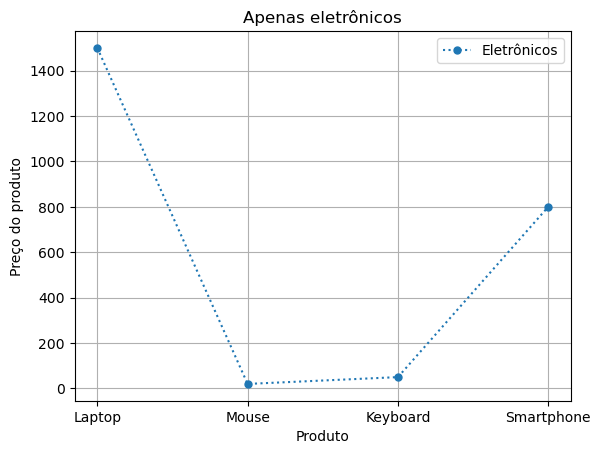

In [11]:
plt.plot(only_eletronics['Product'], only_eletronics['Price'], markersize=10, linestyle=":", marker=".", label="Eletrônicos")

plt.legend()
plt.xlabel('Produto')
plt.ylabel('Preço do produto')

plt.title('Apenas eletrônicos')

plt.grid()
plt.show()

#### 4. Total de vendas por categoria: Calcule o total de vendas (em quantidade) para cada categoria e exiba o resultado.

In [12]:
read_sales_data

,OrderID,Product,Category,Quantity,Price,Date
0,1,Laptop,Electronics,2,1500,2025-03-10
1,2,Mouse,Electronics,5,20,2025-03-11
2,3,Keyboard,Electronics,3,50,2025-03-12
3,4,T-Shirt,Clothing,4,15,2025-03-12
4,5,Shoes,Clothing,2,100,2025-03-13
5,6,Book,Books,7,10,2025-03-13
6,7,Smartphone,Electronics,1,800,2025-03-14
7,8,Jacket,Clothing,2,70,2025-03-15
8,9,Notebook,Stationery,10,5,2025-03-15
9,10,Pen,Stationery,20,1,2025-03-16


In [13]:
# Agrupando por categoria e somando a coluna quantidade.

quantity_category = read_sales_data.groupby('Category')[['Quantity']].sum().reset_index()
quantity_category

,Category,Quantity
0,Books,7
1,Clothing,8
2,Electronics,11
3,Stationery,30


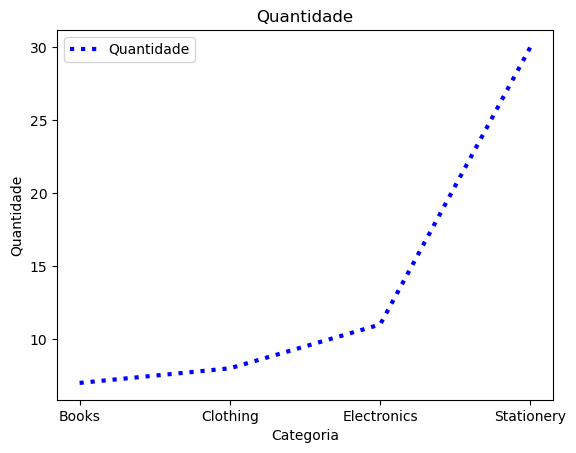

In [14]:
plt.plot(quantity_category['Category'], quantity_category['Quantity'], label="Quantidade", linestyle=":", color='b', linewidth=3)

plt.legend()
plt.title('Quantidade')

plt.xlabel('Categoria')
plt.ylabel('Quantidade')

plt.show()

#### 5. Vendas em uma data específica: Exiba todas as vendas que ocorreram no dia '2025-03-13'.

In [15]:
# Converte a coluna date (que antes era object) para datetime
read_sales_data['Date'] = pd.to_datetime(read_sales_data['Date'])

read_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   OrderID   10 non-null     int64         
 1   Product   10 non-null     object        
 2   Category  10 non-null     object        
 3   Quantity  10 non-null     int64         
 4   Price     10 non-null     int64         
 5   Date      10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 612.0+ bytes


In [16]:
# Filtra as datas do dia '2025-03-13'.

dates = read_sales_data[read_sales_data['Date'] == '2025-03-13']

dates

,OrderID,Product,Category,Quantity,Price,Date
4,5,Shoes,Clothing,2,100,2025-03-13
5,6,Book,Books,7,10,2025-03-13


#### 6. Calcular o total de receita gerada por cada produto:

##### Multiplique a Quantidade pelo Preço para cada venda e adicione uma nova coluna chamada Total ao DataFrame.

In [17]:
read_sales_data

,OrderID,Product,Category,Quantity,Price,Date
0,1,Laptop,Electronics,2,1500,2025-03-10
1,2,Mouse,Electronics,5,20,2025-03-11
2,3,Keyboard,Electronics,3,50,2025-03-12
3,4,T-Shirt,Clothing,4,15,2025-03-12
4,5,Shoes,Clothing,2,100,2025-03-13
5,6,Book,Books,7,10,2025-03-13
6,7,Smartphone,Electronics,1,800,2025-03-14
7,8,Jacket,Clothing,2,70,2025-03-15
8,9,Notebook,Stationery,10,5,2025-03-15
9,10,Pen,Stationery,20,1,2025-03-16


In [18]:
# Criando uma nova coluna se baseando em resultados de outras duas colunas

read_sales_data['Total'] = read_sales_data['Quantity'] * read_sales_data['Price']

read_sales_data

,OrderID,Product,Category,Quantity,Price,Date,Total
0,1,Laptop,Electronics,2,1500,2025-03-10,3000
1,2,Mouse,Electronics,5,20,2025-03-11,100
2,3,Keyboard,Electronics,3,50,2025-03-12,150
3,4,T-Shirt,Clothing,4,15,2025-03-12,60
4,5,Shoes,Clothing,2,100,2025-03-13,200
5,6,Book,Books,7,10,2025-03-13,70
6,7,Smartphone,Electronics,1,800,2025-03-14,800
7,8,Jacket,Clothing,2,70,2025-03-15,140
8,9,Notebook,Stationery,10,5,2025-03-15,50
9,10,Pen,Stationery,20,1,2025-03-16,20


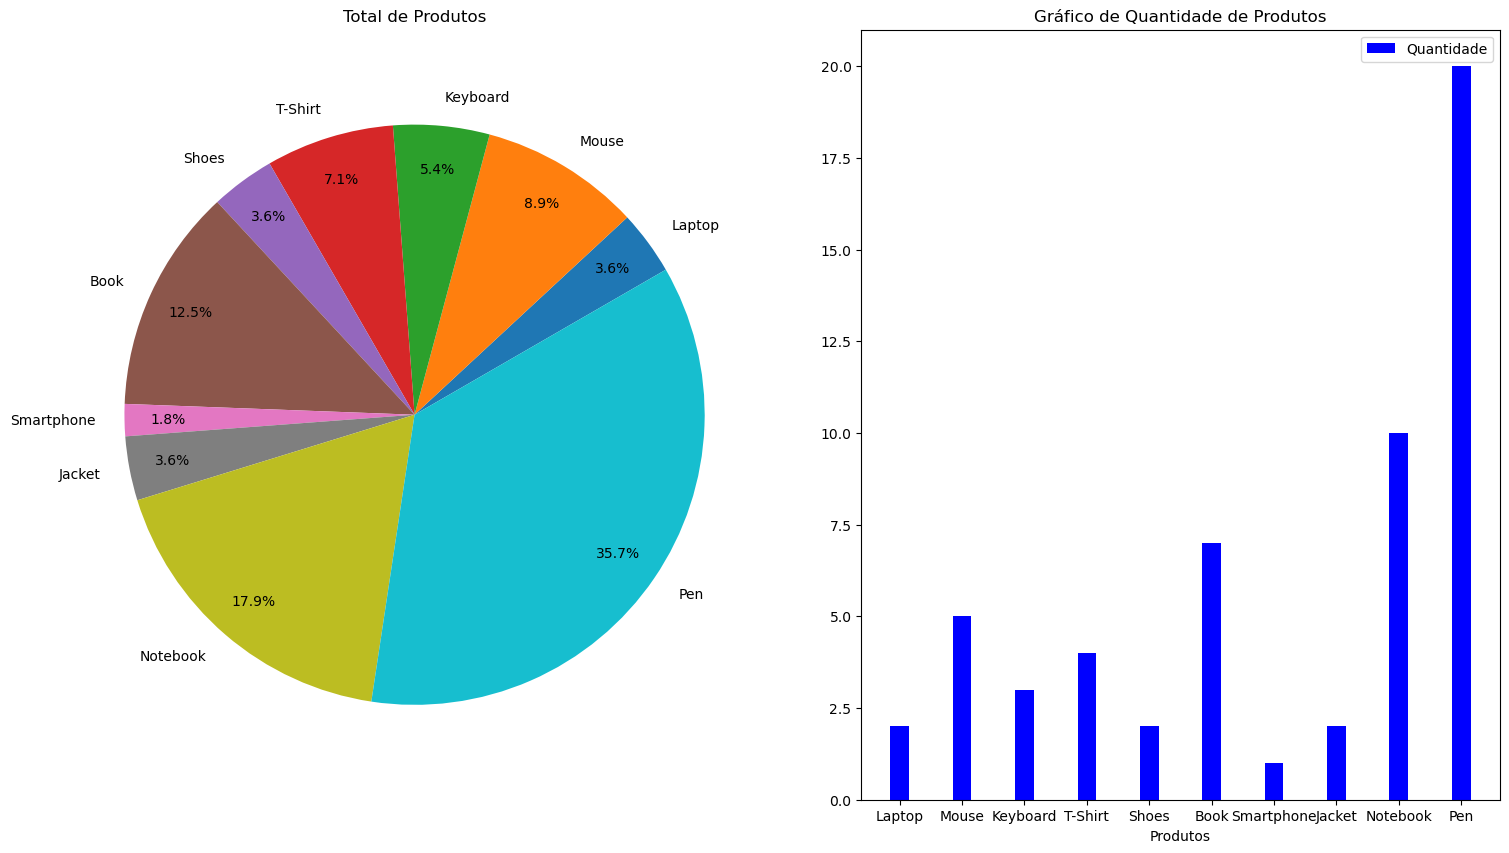

In [19]:
x = read_sales_data['Product']
y = read_sales_data['Quantity']

fig = plt.figure(figsize=(28, 10))

ax = fig.add_subplot(1, 3, 2)
ax.bar(x, y, label="Quantidade", width=0.3, color='b')

ax.legend()
ax.set_title('Gráfico de Quantidade de Produtos')

ax.set_xlabel('Produtos')

# Gráfico dois

ax_2 = fig.add_subplot(1, 3, 1)
ax_2.pie(y, labels=x, autopct='%1.1f%%', startangle=30, pctdistance=0.85)
ax_2.set_title('Total de Produtos')
ax_2.axis('equal') 

plt.savefig('gráfico.png', dpi=300, bbox_inches='tight')

plt.show()

#### 7. Filtrar vendas com receita acima de 500:

##### Usando a nova coluna Total que você acabou de criar, filtre e exiba apenas as vendas cujo valor total seja maior que 500.

In [20]:
# Filtrando pela coluna de forma descendente
order_total_desc = read_sales_data.sort_values(by=['Total'], ascending=False)

order_total_desc

,OrderID,Product,Category,Quantity,Price,Date,Total
0,1,Laptop,Electronics,2,1500,2025-03-10,3000
6,7,Smartphone,Electronics,1,800,2025-03-14,800
4,5,Shoes,Clothing,2,100,2025-03-13,200
2,3,Keyboard,Electronics,3,50,2025-03-12,150
7,8,Jacket,Clothing,2,70,2025-03-15,140
1,2,Mouse,Electronics,5,20,2025-03-11,100
5,6,Book,Books,7,10,2025-03-13,70
3,4,T-Shirt,Clothing,4,15,2025-03-12,60
8,9,Notebook,Stationery,10,5,2025-03-15,50
9,10,Pen,Stationery,20,1,2025-03-16,20


#### 8. Encontrar o produto mais vendido em quantidade:

##### Calcule a quantidade total vendida de cada produto e descubra qual produto teve o maior volume de vendas.



In [21]:
# Agrupa pela coluna de produto, filtra pela coluna de quantidade, some todos os valores e encontre o maior valor entre eles

sum_quantity = read_sales_data.groupby('Product')[['Quantity']].sum().idxmax()

sum_quantity['Quantity']


'Pen'

#### 9. Filtrar vendas que ocorreram em março de 2025:

##### Exiba todas as vendas que ocorreram no mês de março de 2025 (independente do dia).

In [22]:
max_sale_month_25 = read_sales_data.sort_values(by='Price', ascending=False, ignore_index=True)[['Product', 'Date','Price']]

max_sale_month_25

,Product,Date,Price
0,Laptop,2025-03-10,1500
1,Smartphone,2025-03-14,800
2,Shoes,2025-03-13,100
3,Jacket,2025-03-15,70
4,Keyboard,2025-03-12,50
5,Mouse,2025-03-11,20
6,T-Shirt,2025-03-12,15
7,Book,2025-03-13,10
8,Notebook,2025-03-15,5
9,Pen,2025-03-16,1


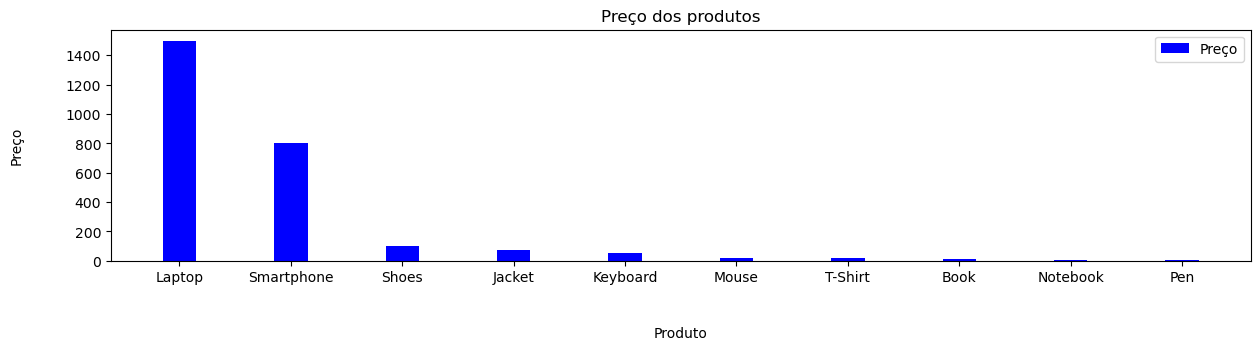

In [29]:
x = max_sale_month_25['Product']
y = max_sale_month_25['Price']

fig = plt.figure(figsize=(50, 3))
ax = fig.add_subplot(1, 3, 2)
ax.bar(x, y, label="Preço", width=0.3, color='b')
ax.legend()
ax.set_title('Preço dos produtos')
ax.set_ylabel('Preço', labelpad=30)
ax.set_xlabel('Produto', labelpad=30)


plt.show()